In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# IMPORT DATA

In [30]:
df = pd.read_csv('Order_Info.csv',index_col='id')
df.head()

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,
1,232148841,2794924,268,110001,35300,35300,9058255c90,3,01/01/2020 12:53,01/01/2020 12:53
2,222298971,1664684,801,330001,51200,49900,e0e6019897,2,01/01/2020 21:42,01/01/2020 21:43
3,211494392,2669372,934,220002,62100,62100,9058255c90,3,01/01/2020 14:10,01/01/2020 14:11
4,334575272,1924727,422,230001,50600,42000,46d5cea30d,2,01/01/2020 17:43,01/01/2020 17:43
5,144825651,4148671,473,130006,149100,142000,6ff1752b69,2,01/01/2020 18:52,01/01/2020 18:52


Observe the distribution of the data using the describe and info methods, respectively:

In [21]:
df.describe()

,orderId,userId,productId,cityId,price,payMoney,deviceType
count,1.045570e+05,1.045570e+05,104557.000000,104557.000000,1.045570e+05,1.045570e+05,104557.000000
mean,2.993341e+08,3.270527e+06,504.566275,154410.947225,9.167350e+04,8.686689e+04,2.385292
std,5.149818e+07,4.138208e+07,288.130647,72197.163762,9.158836e+04,9.072028e+04,0.648472
min,1.035627e+08,2.930600e+04,0.000000,30000.000000,6.000000e+02,-1.000000e+03,1.000000
25%,2.633627e+08,2.179538e+06,254.000000,100011.000000,3.790000e+04,3.360000e+04,2.000000
50%,2.989828e+08,2.705995e+06,507.000000,150001.000000,5.920000e+04,5.500000e+04,2.000000
75%,3.349972e+08,3.271237e+06,758.000000,220002.000000,1.080000e+05,1.040000e+05,3.000000
max,4.871430e+08,3.072939e+09,1000.000000,380001.000000,2.295600e+06,2.294200e+06,6.000000


There are problems with two pieces of data: minimum value of productID is 0 and minimum value of payMoney is negative.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104557 entries, 1 to 104557
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   orderId     104557 non-null  int64 
 1   userId      104557 non-null  int64 
 2   productId   104557 non-null  int64 
 3   cityId      104557 non-null  int64 
 4   price       104557 non-null  int64 
 5   payMoney    104557 non-null  int64 
 6   channelId   104549 non-null  object
 7   deviceType  104557 non-null  int64 
 8   createTime  104557 non-null  object
 9   payTime     104557 non-null  object
dtypes: int64(7), object(3)
memory usage: 7.6+ MB


As you can see, there are 104557 pieces of data in total, of which 8 pieces of channelID are missing.

# Cleaning data

Based on the characteristics of the fields, judgment and cleaning are performed one by one.

## orderID

Since the orderID is unique in the system.

Check to see if there are any duplicate orderIDs. and if there are. it is common to deal with duplicate values last. continue cleaning the other fields first because the other fields may affect the duplicate value.


In [32]:
df.orderId.unique().size

104530

In [33]:
df.orderId.size

104557

As can be seen, there are 27 duplicate values for orderID.

## userID

The userID can be duplicated, there are no other special requirements. From the df.info() result, the userID is complete and no further cleaning is required.

## productID

The minimum value of productId is 0. Let's look at the number of records with a value of 0. There are 177 records. The total number of records is 177, which may be caused by the product being uploaded and downloaded. Delete them after processing the other fields.

In [35]:
df.productId[(df.productId == 0)].size

177

## cityID

cityID is similar to userID in that the values are within the normal range and do not need to be processed further.

## price

price There are no null values and all are greater than 0. but the unit is cents, which by convention needs to be made into dollars.

In [37]:
df.price = df.price / 100

## payMoney

payMoney has a negative value, and we can't place an order with a negative value, so we delete the records with a negative value here. There are 6 records in total, so deleting them will have no effect. And convert the unit of payMoney to Yuan.

In [38]:
df[df.payMoney < 0]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,
25344,288096069,2145955,511,230014,1.11,-1000,df9f79c426,2,11/03/2020 21:32,11/03/2020 21:33
55044,296608442,4073997,385,120006,1.11,-1000,cbccc0808e,2,24/05/2020 08:52,24/05/2020 08:52
66897,316685479,1949907,554,60019,20.84,-1000,9058255c90,3,31/03/2020 11:57,31/03/2020 11:57
72556,323229098,2894042,548,220008,1.14,-1000,41a4e91d29,2,09/08/2020 14:24,09/08/2020 14:24
81494,311194385,3370399,797,40001,1.16,-990,ea5648bbe2,1,06/09/2020 11:20,06/09/2020 11:21
87878,324068352,1873953,602,260003,2.92,-1000,9058255c90,3,05/10/2020 10:47,05/10/2020 10:47


In [39]:
df.drop(index=df[df.payMoney < 0].index, inplace=True)

In [40]:
df[df.payMoney < 0].index

Index([], dtype='int64', name='id')

In [41]:
df.payMoney = df.payMoney / 100

## channelId

channelId According to the result of info, there are 8 missing data, which may be due to incomplete entry. The amount of data is small and will not affect the analysis, so it can be deleted directly.

In [42]:
df[df.channelId.isnull()]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,
19086,284008366,3309847,698,240001,21.64,2040.0,NaN,2,08/03/2020 22:36,08/03/2020 22:36
38175,287706890,2799815,823,70001,7.60,749.0,NaN,3,10/06/2020 22:30,10/06/2020 22:30
48073,248057459,3970570,142,130001,4.74,400.0,NaN,2,30/03/2020 12:59,30/03/2020 12:59
75949,266847859,3761925,649,120006,2.57,257.0,NaN,2,19/08/2020 08:46,19/08/2020 08:46
100952,283627429,4156620,269,280001,4.84,410.0,NaN,2,13/12/2020 13:24,13/12/2020 14:47
100953,346836140,3751526,738,100013,1.05,80.0,NaN,1,13/12/2020 13:47,13/12/2020 13:47
100954,352853915,2229389,786,240001,4.74,440.0,NaN,2,13/12/2020 16:54,13/12/2020 16:55
100955,379473081,4531810,18,180009,1.46,50.0,NaN,3,13/12/2020 20:18,13/12/2020 20:18


In [43]:
df.drop(index=df[df.channelId.isnull()].index, inplace=True)

In [44]:
df[df.channelId.isnull()]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,


## createTime and payTime

Neither of them has null, but here we need to count the data in 2020, so we delete the createTime non-2020 data.

First convert createTime and payTime to datetime format.

In [46]:
df.createTime = pd.to_datetime(df.createTime, format="%d/%m/%Y %H:%M")
df.payTime = pd.to_datetime(df.payTime, format="%d/%m/%Y %H:%M")
df.dtypes

orderId                int64
userId                 int64
productId              int64
cityId                 int64
price                float64
payMoney             float64
channelId             object
deviceType             int64
createTime    datetime64[ns]
payTime       datetime64[ns]
dtype: object

In [47]:
import datetime
startTime = datetime.datetime(2020, 1, 1)
endTime = datetime.datetime(2020, 12, 31, 23, 59, 59)

In [48]:
df[df.createTime < startTime]
df.drop(index=df[df.createTime < startTime].index, inplace=True) 
df.drop(index=df[df.createTime > df.payTime].index, inplace=True)
df[df.createTime < startTime]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,


In [49]:
df[df.createTime > endTime]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,


In [50]:
df[df.payTime < startTime]

,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
id,,,,,,,,,,


## Overall Cleaning

1. Delete records with duplicate orderId
2. Delete the record with productId 0.

In [51]:
df.drop(index=df[df.orderId.duplicated()].index, inplace=True) 
df.orderId.unique().size

104506

In [52]:
df.drop(index=df[df.productId==0].index, inplace=True)

# Analyzing data

## View data in general

In [53]:
#Total orders, total users placing orders, total sales, number of items with running water

print(df.orderId.count()) 
print(df.userId.unique().size) 
print(df.payMoney.sum()/100)
print(df.productId.unique().size)

104329
102447
906663.997
1000


## Merchandise sales and sales analysis

In [54]:
#Top 10 and Bottom 10 Selling Categories
productId_orderCount = df.groupby('productId').count() ['orderId'].sort_values(ascending=False)
print(productId_orderCount.head(10))
print(productId_orderCount.tail(10))

productId
895    354
762    350
103    334
587    303
385    302
60     301
38     301
403    297
345    292
823    288
Name: orderId, dtype: int64
productId
948     29
856     28
621     27
272     26
563     24
347     21
597     19
468     18
986     16
1000    13
Name: orderId, dtype: int64


In [59]:
# Top 10 and bottom 10 sales categories
productId_totalPay = df.groupby('productId')['payMoney'].sum().sort_values(ascending=False)
print(productId_totalPay.head(10))
print(productId_totalPay.tail(10))

productId
385    427522.1
61     361572.0
103    344641.2
405    339525.0
720    322405.1
345    320162.2
698    318458.6
182    296600.0
383    280790.0
396    269556.0
Name: payMoney, dtype: float64
productId
310     22879.0
847     22869.0
454     22535.0
817     22509.0
597     21847.0
408     18111.0
986     14784.0
964     14238.0
1000    12169.0
347     12070.0
Name: payMoney, dtype: float64


In [60]:
#See the intersection of sales and sales of the last 100 items
problem_productIds = productId_totalPay.tail(100).index.intersection(productId_orderCount.tail(100).index)
print(problem_productIds)

Index([  14,  807,  599,  676,    7,  469,  577,  551,  318,  220,  528,  303,
        314,  359,  629,  582,  985,  218,  578,  227,  277,  145,  855,  586,
        958,   91,  856,  948,  859,  874,  806,  272,  352,  392,   27,  460,
        436,  468,  579,  868,  137,   16,  590,  247,  569,  242,  104,  621,
        478,  310,  847,  454,  817,  597,  408,  986,  964, 1000,  347],
      dtype='int64', name='productId')


The analysis shows that the above mentioned items with poor sales and sales volume are discussed with the business to determine if they should be optimized or taken off the shelves.

## Channel Analysis

In [61]:
#Top 10 selling channels
productId_channel_orderCount = df.groupby('channelId').count() ['orderId'].sort_values(ascending=False)
print(productId_channel_orderCount.head(10))

channelId
9058255c90    38822
29d55d09c6     7411
41a4e91d29     6737
df9f79c426     5929
46d5cea30d     4943
e0e6019897     3686
e7dc8ef259     3530
ad7e4ca9ae     2887
4c33002d9a     2818
e22babe5d4     2415
Name: orderId, dtype: int64


In [62]:
# Sales across channels and commodities
productId_channel_orderCount = df.groupby(['channelId','productId']).count() ['orderId'].sort_values(ascending=False)
print(productId_channel_orderCount)

channelId   productId
9058255c90  762          132
            385          125
            895          123
            103          120
            613          115
                        ... 
871e94eabc  627            1
            613            1
            584            1
            578            1
fffb629ba1  785            1
Name: orderId, Length: 28468, dtype: int64


In [65]:
#Sales by channel, by product
productId_channel_totalPay = df.groupby(['channelId','productId']) ['payMoney'].sum().sort_values(ascending=False)
print(productId_channel_totalPay)

channelId   productId
9058255c90  385          188085.1
            405          163446.0
            345          150250.2
            61           139829.0
            720          130654.0
                           ...   
e0e6019897  537               0.0
a33b212a84  248               0.0
            338               0.0
8664ebb1ed  507               0.0
5fb938db89  385               0.0
Name: payMoney, Length: 28468, dtype: float64


Obtain the cost of the top ten selling channels, further analyze the overall channel effectiveness, and analyze the differences in merchandise sales by channel.

## Order Time Analysis

View the time distribution of orders placed, by hour, by week.

<AxesSubplot:xlabel='orderHour'>

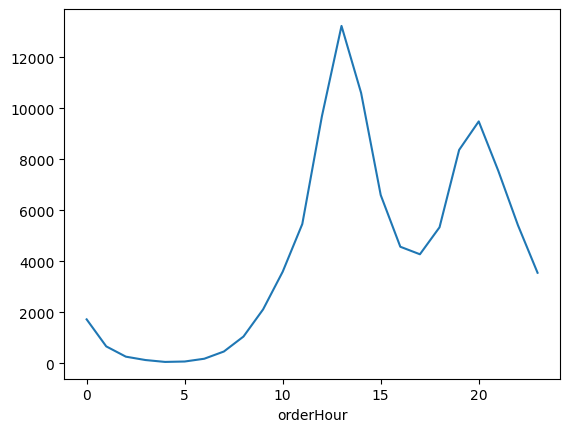

In [66]:
df['orderHour'] = df.createTime.dt.hour
df.groupby('orderHour').count()['orderId'].plot()

In [67]:
df['orderWeek'] = df.createTime.dt.dayofweek
df.groupby('orderWeek').count()['orderId']

orderWeek
0    12932
1    13794
2    16198
3    19496
4    16922
5    12503
6    12484
Name: orderId, dtype: int64

It can be seen from this:

Two peak periods exist each day, 12-14pm and around 20pm.
Every week, Saturday has the most volume, followed by Friday and Sunday.
It is appropriate to place more promotions at this stage.